# 주제 : 프로그래밍 언어와 책 가격 및 페이지수 상관관계 분석

---

## 1. 데이터 준비

### 1-1. 필요한 모듈 불러오기

In [1]:
import os
import sys
import urllib.request
import json 
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family="Arial Unicode MS")
get_ipython().run_line_magic('matplotlib', 'inline')

### 1-2. Naver Books API 호출을 통한 정보 수집 

In [3]:
client_id = "uAbavg012XaXAEn8gVKz"
client_secret = "lMjPL4LlAk"

In [4]:
# 검색 URL 생성 함수
def gen_search_url(api_node, search_text, start_num, disp_num):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

In [5]:
# 검색 결과 수집 함수
def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    response = urllib.request.urlopen(request)

    return json.loads(response.read().decode("utf-8"))

### 1-3. 데이터 정제 및 기본 데이터프레임 구성

In [6]:
# b태그 제거 함수
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    
    return input_str

In [7]:
df = pd.DataFrame({
    "제목": [],
    "링크": [],
    "저자": [],
    "출판사": [],
    "출판일": [],
    "ISBN": [],
    "가격":[],
    "언어":[]
})

In [8]:
# 판다스 데이터프레임 변환 함수
def get_fields(json_data):
    title = [delete_tag(each["title"]) for each in json_data["items"]]
    link = [each["link"] for each in json_data["items"]]
    author = [delete_tag(each["author"]) for each in json_data["items"]]
    publisher = [delete_tag(each["publisher"]) for each in json_data["items"]]
    pubdate = [each["pubdate"] for each in json_data["items"]]
    isbn = [each["isbn"] for each in json_data["items"]]
    price = [each["price"] for each in json_data["items"]]
    
    result_pd = pd.DataFrame({
        "제목":title,
        "링크":link,
        "저자":author,
        "출판사":publisher,
        "출판일": pubdate,
        "ISBN":isbn,
        "가격": price
    }, columns=["제목", "링크", "저자", "출판사", "출판일", "ISBN","가격"])
    
    return result_pd

In [10]:
# 데이터셋 구성 함수
def make_dataset(language):
    url = gen_search_url("book", language, 1, 20)
    one_result = get_result_onpage(url)
    result = get_fields(one_result)
    result["언어"] = language
    
    return result

In [11]:
arr = ['파이썬','Python','C언어','Java','C++','C#','Visual Basic','자바스크립트','SQL','PHP','어셈블리어',
       'Classic Visual Basic', 'go프로그래밍', 'MATLAB','R프로그래밍', '그루비프로그래밍','루비언어','swift프로그래밍',
       '포트란','펄Perl','델파이','오브젝트파스칼'
      ]

for name in arr:
    tmp = make_dataset(name)
    df = pd.concat([df, tmp])

In [12]:
df.head()

,제목,링크,저자,출판사,출판일,ISBN,가격,언어
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,http://book.naver.com/bookdb/book_detail.php?b...,나동빈,한빛미디어,20200805,1162243074 9791162243077,34000,파이썬
1,Do it! 점프 투 파이썬,http://book.naver.com/bookdb/book_detail.php?b...,박응용,이지스퍼블리싱,20190620,1163030910 9791163030911,18800,파이썬
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),http://book.naver.com/bookdb/book_detail.php?b...,윤인성,한빛미디어,20190610,1162241888 9791162241882,18000,파이썬
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),http://book.naver.com/bookdb/book_detail.php?b...,박상길,책만,20200715,1189909170 9791189909178,38000,파이썬
4,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",http://book.naver.com/bookdb/book_detail.php?b...,김황후,한빛미디어,20200701,1162243201 9791162243206,32000,파이썬


In [13]:
df.tail()

,제목,링크,저자,출판사,출판일,ISBN,가격,언어
15,델파이 4 모든 것,http://book.naver.com/bookdb/book_detail.php?b...,정지훈|신현묵,인포북,19990205,8980543735 9788980543731,30000,오브젝트파스칼
16,DELPHI 4,http://book.naver.com/bookdb/book_detail.php?b...,박찬용,가메,19981223,898078063X 9788980780631,18000,오브젝트파스칼
17,DELPHI PROGRAMMING BIBLE VER.4.X,http://book.naver.com/bookdb/book_detail.php?b...,석봉현,영진닷컴,19990210,8931411197 9788931411195,32000,오브젝트파스칼
18,"DELPHI 4 시작,그리고 완성",http://book.naver.com/bookdb/book_detail.php?b...,다우기술Delphi기술팀,대림,19981026,8972804649 9788972804642,39000,오브젝트파스칼
19,정보처리기사 산업기 DELPHI 특별대비 실기,http://book.naver.com/bookdb/book_detail.php?b...,노표섭,영진닷컴,20000415,8931414390 9788931414394,15000,오브젝트파스칼


### 1-4. 책 페이지 수 웹크롤링

In [14]:
from bs4 import BeautifulSoup
from selenium import webdriver
from tqdm import tqdm
import time

In [15]:
driver = webdriver.Chrome("../driver/chromedriver")
page_list = []

for url in tqdm(df['링크']):
    try:
        driver.get(url)
        time.sleep(1)

        page_element = driver.find_element_by_xpath('//*[@id="container"]/div[4]/div[1]/div[2]/div[3]')
        page_number = page_element.text.split('|')[0].split(' ')[1]
        time.sleep(1)

        page_list.append(page_number)
    
    except:
        page_list.append(None)
        pass
    
print(page_list)
driver.quit()

100%|█████████████████████████████████████████| 435/435 [18:26<00:00,  2.54s/it]


['604', '360', '460', '724', '460', '648', '444', '424', '296', '268', '200', '504', '868', '364', '380', '336', '624', '308', '640', '640', '640', '310', '130', '368', '850', '308', '544', '190', '304', '158', '175', '616', '250', '280', '9783030780548', '195', '431', '400', '200', '560', '776', '552', '560', '576', '372', None, '406', '1,440', '544', None, '544', 'Programming', '278', '516', '304', '321', '812', '536', '552', '800', '852', '700', '1,022', 'Java', '652', '9788970508887', '1,224', '901', '886', '788', '370', '458', '195', '659', '402', 'first', '825', '576', '528', '9784813299530', '696', '652', '552', '640', '600', 'C++', 'C++', '740', '640', '592', 'modern', '684', '576', 'Patterns', '524', '608', 'C++', '448', '792', 'of', '856', '480', '844', '536', '964', '290', '272', '652', '340', '884', 'C#', 'Effective', '604', '9781119795780', '488', '684', 'Unity', '324', '252', '272', '402', '262', '550', '240', '419', '688', '688', '268', '208', '356', '408', '305', '202',

In [16]:
len(page_list)

435

### 1-5. 데이터 정제

#### 이상치 제거

In [18]:
for i in range(len(page_list)):
    if page_list[i] == None:
        continue
        
    if len(page_list[i]) > 5:
        page_list[i] = None
    
    if page_list[i] == 'C++' or page_list[i] == 'C#' or page_list[i] == 'Unity':
        page_list[i] = None

    if page_list[i] == 'first':
        page_list[i] = None
        
    if page_list[i] == 'of' or page_list[i] == 'FOR' or page_list[i] == 'for':
        page_list[i] = None
        
    if page_list[i] == 'The':
        page_list[i] = None
    
    if page_list[i] == 'and' or page_list[i] == 'on':
        page_list[i] = None
    
    if page_list[i] == 'web' or page_list[i] == 'Web':
        page_list[i] = None
        
    if page_list[i] == 'in' or page_list[i] == 'Under' or page_list[i] == 'to':
        page_list[i] = None
        
    if page_list[i] == '&' or page_list[i] == ':' or page_list[i] == '5.0':
        page_list[i] = None
        
    if page_list[i] == 'R' or page_list[i] == 'Perl':
        page_list[i] = None
        
    if page_list[i] == 'Swift' or page_list[i] == 'Ruby' or page_list[i] == 'Java':
        page_list[i] = None

print(page_list)

['604', '360', '460', '724', '460', '648', '444', '424', '296', '268', '200', '504', '868', '364', '380', '336', '624', '308', '640', '640', '640', '310', '130', '368', '850', '308', '544', '190', '304', '158', '175', '616', '250', '280', None, '195', '431', '400', '200', '560', '776', '552', '560', '576', '372', None, '406', '1,440', '544', None, '544', None, '278', '516', '304', '321', '812', '536', '552', '800', '852', '700', '1,022', None, '652', None, '1,224', '901', '886', '788', '370', '458', '195', '659', '402', None, '825', '576', '528', None, '696', '652', '552', '640', '600', None, None, '740', '640', '592', None, '684', '576', None, '524', '608', None, '448', '792', None, '856', '480', '844', '536', '964', '290', '272', '652', '340', '884', None, None, '604', None, '488', '684', None, '324', '252', '272', '402', '262', '550', '240', '419', '688', '688', '268', '208', '356', '408', '305', '202', '408', '776', '536', '432', '528', '464', '608', '648', None, '496', '500', '400

#### 문자열 타입을 숫자 타입으로 변환 & 숫자에 있는 콤마(,) 기호 제거

In [22]:
page_numbers = []

for item in page_list:
    if item == None:
        page_numbers.append(None)
        
    elif item.find(',') != -1:
        elem = int(item.replace(',',''))
        page_numbers.append(elem)

    else:
        elem = int(item)
        page_numbers.append(elem)
    
print(page_numbers)

[604, 360, 460, 724, 460, 648, 444, 424, 296, 268, 200, 504, 868, 364, 380, 336, 624, 308, 640, 640, 640, 310, 130, 368, 850, 308, 544, 190, 304, 158, 175, 616, 250, 280, None, 195, 431, 400, 200, 560, 776, 552, 560, 576, 372, None, 406, 1440, 544, None, 544, None, 278, 516, 304, 321, 812, 536, 552, 800, 852, 700, 1022, None, 652, None, 1224, 901, 886, 788, 370, 458, 195, 659, 402, None, 825, 576, 528, None, 696, 652, 552, 640, 600, None, None, 740, 640, 592, None, 684, 576, None, 524, 608, None, 448, 792, None, 856, 480, 844, 536, 964, 290, 272, 652, 340, 884, None, None, 604, None, 488, 684, None, 324, 252, 272, 402, 262, 550, 240, 419, 688, 688, 268, 208, 356, 408, 305, 202, 408, 776, 536, 432, 528, 464, 608, 648, None, 496, 500, 400, 202, 548, 284, 347, 448, 616, 284, 380, 202, 400, 568, None, None, None, 504, 480, 516, 760, 839, 556, 296, 724, 279, 296, 352, 560, 708, None, 225, 316, 580, 456, None, 456, 320, None, 456, 456, None, None, None, None, None, None, 825, None, 292, 644,

In [23]:
len(page_numbers)

435

In [24]:
df['페이지수'] = page_numbers

In [25]:
df.head()

,제목,링크,저자,출판사,출판일,ISBN,가격,언어,페이지수
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,http://book.naver.com/bookdb/book_detail.php?b...,나동빈,한빛미디어,20200805,1162243074 9791162243077,34000,파이썬,604.0
1,Do it! 점프 투 파이썬,http://book.naver.com/bookdb/book_detail.php?b...,박응용,이지스퍼블리싱,20190620,1163030910 9791163030911,18800,파이썬,360.0
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),http://book.naver.com/bookdb/book_detail.php?b...,윤인성,한빛미디어,20190610,1162241888 9791162241882,18000,파이썬,460.0
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),http://book.naver.com/bookdb/book_detail.php?b...,박상길,책만,20200715,1189909170 9791189909178,38000,파이썬,724.0
4,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",http://book.naver.com/bookdb/book_detail.php?b...,김황후,한빛미디어,20200701,1162243201 9791162243206,32000,파이썬,460.0


#### 결측치 제거

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 19
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제목      435 non-null    object 
 1   링크      435 non-null    object 
 2   저자      435 non-null    object 
 3   출판사     435 non-null    object 
 4   출판일     435 non-null    object 
 5   ISBN    435 non-null    object 
 6   가격      435 non-null    object 
 7   언어      435 non-null    object 
 8   페이지수    331 non-null    float64
dtypes: float64(1), object(8)
memory usage: 34.0+ KB


In [30]:
df.dropna(inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 19
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제목      331 non-null    object 
 1   링크      331 non-null    object 
 2   저자      331 non-null    object 
 3   출판사     331 non-null    object 
 4   출판일     331 non-null    object 
 5   ISBN    331 non-null    object 
 6   가격      331 non-null    object 
 7   언어      331 non-null    object 
 8   페이지수    331 non-null    float64
dtypes: float64(1), object(8)
memory usage: 25.9+ KB


In [32]:
df = df.astype({'페이지수':'int'})

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 19
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      331 non-null    object
 1   링크      331 non-null    object
 2   저자      331 non-null    object
 3   출판사     331 non-null    object
 4   출판일     331 non-null    object
 5   ISBN    331 non-null    object
 6   가격      331 non-null    object
 7   언어      331 non-null    object
 8   페이지수    331 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 25.9+ KB


In [34]:
df.head()

,제목,링크,저자,출판사,출판일,ISBN,가격,언어,페이지수
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,http://book.naver.com/bookdb/book_detail.php?b...,나동빈,한빛미디어,20200805,1162243074 9791162243077,34000,파이썬,604
1,Do it! 점프 투 파이썬,http://book.naver.com/bookdb/book_detail.php?b...,박응용,이지스퍼블리싱,20190620,1163030910 9791163030911,18800,파이썬,360
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),http://book.naver.com/bookdb/book_detail.php?b...,윤인성,한빛미디어,20190610,1162241888 9791162241882,18000,파이썬,460
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),http://book.naver.com/bookdb/book_detail.php?b...,박상길,책만,20200715,1189909170 9791189909178,38000,파이썬,724
4,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",http://book.naver.com/bookdb/book_detail.php?b...,김황후,한빛미디어,20200701,1162243201 9791162243206,32000,파이썬,460


#### 언어 컬럼 표기 내용 통일

In [35]:
df["언어"].unique()

array(['파이썬', 'Python', 'C언어', 'Java', 'C++', 'C#', 'Visual Basic',
       '자바스크립트', 'SQL', 'PHP', '어셈블리어', 'Classic Visual Basic', 'go프로그래밍',
       'MATLAB', 'R프로그래밍', '그루비프로그래밍', '루비언어', 'swift프로그래밍', '포트란',
       '펄Perl', '델파이', '오브젝트파스칼'], dtype=object)

In [36]:
df.loc[df["언어"] == "파이썬", "언어"] = "Python"
df.loc[df["언어"] == "C언어", "언어"] = "C"
df.loc[df["언어"] == "자바스크립트", "언어"] = "JavaScript"
df.loc[df["언어"] == "어셈블리어", "언어"] = "Assembly Language"
df.loc[df["언어"] == "go프로그래밍", "언어"] = "Go"
df.loc[df["언어"] == "R프로그래밍", "언어"] = "R"
df.loc[df["언어"] == "그루비프로그래밍", "언어"] = "Groovy"
df.loc[df["언어"] == "루비언어", "언어"] = "Ruby"
df.loc[df["언어"] == "swift프로그래밍", "언어"] = "Swift"
df.loc[df["언어"] == "포트란", "언어"] = "Fortran"
df.loc[df["언어"] == "펄Perl", "언어"] = "Perl"
df.loc[df["언어"] == "델파이", "언어"] = "Delphi"
df.loc[df["언어"] == "오브젝트파스칼", "언어"] = "Object Pascal"

In [37]:
df["언어"].unique()

array(['Python', 'C', 'Java', 'C++', 'C#', 'Visual Basic', 'JavaScript',
       'SQL', 'PHP', 'Assembly Language', 'Classic Visual Basic', 'Go',
       'MATLAB', 'R', 'Groovy', 'Ruby', 'Swift', 'Fortran', 'Perl',
       'Delphi', 'Object Pascal'], dtype=object)

In [38]:
df.head()

,제목,링크,저자,출판사,출판일,ISBN,가격,언어,페이지수
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,http://book.naver.com/bookdb/book_detail.php?b...,나동빈,한빛미디어,20200805,1162243074 9791162243077,34000,Python,604
1,Do it! 점프 투 파이썬,http://book.naver.com/bookdb/book_detail.php?b...,박응용,이지스퍼블리싱,20190620,1163030910 9791163030911,18800,Python,360
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),http://book.naver.com/bookdb/book_detail.php?b...,윤인성,한빛미디어,20190610,1162241888 9791162241882,18000,Python,460
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),http://book.naver.com/bookdb/book_detail.php?b...,박상길,책만,20200715,1189909170 9791189909178,38000,Python,724
4,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",http://book.naver.com/bookdb/book_detail.php?b...,김황후,한빛미디어,20200701,1162243201 9791162243206,32000,Python,460


####  중복 데이터 제거

In [39]:
len(df["ISBN"].unique())

326

In [40]:
df.drop_duplicates(subset='ISBN', keep='first', inplace=True, ignore_index=False)

In [41]:
len(df["ISBN"].unique())

326

#### 인덱스 재설정

In [42]:
df = df.reset_index(drop=True)
df

,제목,링크,저자,출판사,출판일,ISBN,가격,언어,페이지수
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,http://book.naver.com/bookdb/book_detail.php?b...,나동빈,한빛미디어,20200805,1162243074 9791162243077,34000,Python,604
1,Do it! 점프 투 파이썬,http://book.naver.com/bookdb/book_detail.php?b...,박응용,이지스퍼블리싱,20190620,1163030910 9791163030911,18800,Python,360
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),http://book.naver.com/bookdb/book_detail.php?b...,윤인성,한빛미디어,20190610,1162241888 9791162241882,18000,Python,460
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),http://book.naver.com/bookdb/book_detail.php?b...,박상길,책만,20200715,1189909170 9791189909178,38000,Python,724
4,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",http://book.naver.com/bookdb/book_detail.php?b...,김황후,한빛미디어,20200701,1162243201 9791162243206,32000,Python,460
...,...,...,...,...,...,...,...,...,...
321,델파이 4 모든 것,http://book.naver.com/bookdb/book_detail.php?b...,정지훈|신현묵,인포북,19990205,8980543735 9788980543731,30000,Object Pascal,1116
322,DELPHI 4,http://book.naver.com/bookdb/book_detail.php?b...,박찬용,가메,19981223,898078063X 9788980780631,18000,Object Pascal,620
323,DELPHI PROGRAMMING BIBLE VER.4.X,http://book.naver.com/bookdb/book_detail.php?b...,석봉현,영진닷컴,19990210,8931411197 9788931411195,32000,Object Pascal,1468
324,"DELPHI 4 시작,그리고 완성",http://book.naver.com/bookdb/book_detail.php?b...,다우기술Delphi기술팀,대림,19981026,8972804649 9788972804642,39000,Object Pascal,1580


#### 가격 데이터 타입 변환

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      326 non-null    object
 1   링크      326 non-null    object
 2   저자      326 non-null    object
 3   출판사     326 non-null    object
 4   출판일     326 non-null    object
 5   ISBN    326 non-null    object
 6   가격      326 non-null    object
 7   언어      326 non-null    object
 8   페이지수    326 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 23.0+ KB


In [45]:
df['가격'].unique()

array(['34000', '18800', '18000', '38000', '32000', '23000', '27000',
       '20000', '14000', '12000', '44000', '17000', '37500', '25000',
       '38060', '26000', '99730', '30000', '85480', '35000', '70610',
       '68400', '64670', '22000', '29000', '15000', '28000', '33000',
       '71170', '68820', '44230', '45000', '50000', '17200', '36000',
       '16500', '24000', '16000', '96840', '10000', '13000', '52030',
       '36630', '74350', '39680', '19800', '15900', '39000', '11000',
       '31000', '56920', '21000', '6500', '7000', '9000', '6000', '49400',
       '120920', '72000', '85820', '159070', '86220', '71500', '78000',
       '87179', '42000', '42020', '42700', '44540', '59000', '14800',
       '19000', '171100', '98600', '142100', '84100', '210000', '141230',
       '221250', '158110', '44610', '40000', '19100', '57000', '9500',
       '48000', '8000', '', '8800', '7500', '53000', '96000', '50854',
       '38500', '5000', '4000'], dtype=object)

In [46]:
df[df['가격'] == '']

,제목,링크,저자,출판사,출판일,ISBN,가격,언어,페이지수
272,프로그래밍언어(포트란)실기,http://book.naver.com/bookdb/book_detail.php?b...,노동부 한국산업인력관리공단,한국산업인력관리공단,1993,897160056X 9788971600566,,Fortran,108


In [47]:
df = df[df['가격'] != '']

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 325
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      325 non-null    object
 1   링크      325 non-null    object
 2   저자      325 non-null    object
 3   출판사     325 non-null    object
 4   출판일     325 non-null    object
 5   ISBN    325 non-null    object
 6   가격      325 non-null    object
 7   언어      325 non-null    object
 8   페이지수    325 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 25.4+ KB


In [49]:
df = df.astype({'가격':'int'})

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 325
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      325 non-null    object
 1   링크      325 non-null    object
 2   저자      325 non-null    object
 3   출판사     325 non-null    object
 4   출판일     325 non-null    object
 5   ISBN    325 non-null    object
 6   가격      325 non-null    int64 
 7   언어      325 non-null    object
 8   페이지수    325 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 25.4+ KB


---

## 2. 데이터 분석

### 2-1. 언어별 책 가격

In [54]:
df_price = df[['가격', '언어']].copy()

In [57]:
df_price

,가격,언어
0,34000,Python
1,18800,Python
2,18000,Python
3,38000,Python
4,32000,Python
...,...,...
321,30000,Object Pascal
322,18000,Object Pascal
323,32000,Object Pascal
324,39000,Object Pascal


In [61]:
price_by_language = pd.pivot_table(df_price, index='언어', aggfunc='mean')
price_by_language.sort_values(by='가격', ascending=False)

,가격
언어,
MATLAB,98888.235294
Classic Visual Basic,72124.600000
Java,41148.125000
Perl,37946.166667
Python,33032.894737
Swift,32166.666667
PHP,31384.000000
Visual Basic,31218.500000
C++,30085.714286


In [62]:
price_table = price_by_language.sort_values(by='가격', ascending=False)

In [65]:
price_table = price_table.reset_index()
price_table.columns = ['언어','가격']
price_table.head()

,언어,가격
0,MATLAB,98888.235294
1,Classic Visual Basic,72124.600000
2,Java,41148.125000
3,Perl,37946.166667
4,Python,33032.894737


In [69]:
price_table

,언어,가격
0,MATLAB,98888.235294
1,Classic Visual Basic,72124.600000
2,Java,41148.125000
3,Perl,37946.166667
4,Python,33032.894737
5,Swift,32166.666667
6,PHP,31384.000000
7,Visual Basic,31218.500000
8,C++,30085.714286
9,Groovy,29285.714286


<AxesSubplot:xlabel='언어', ylabel='가격'>

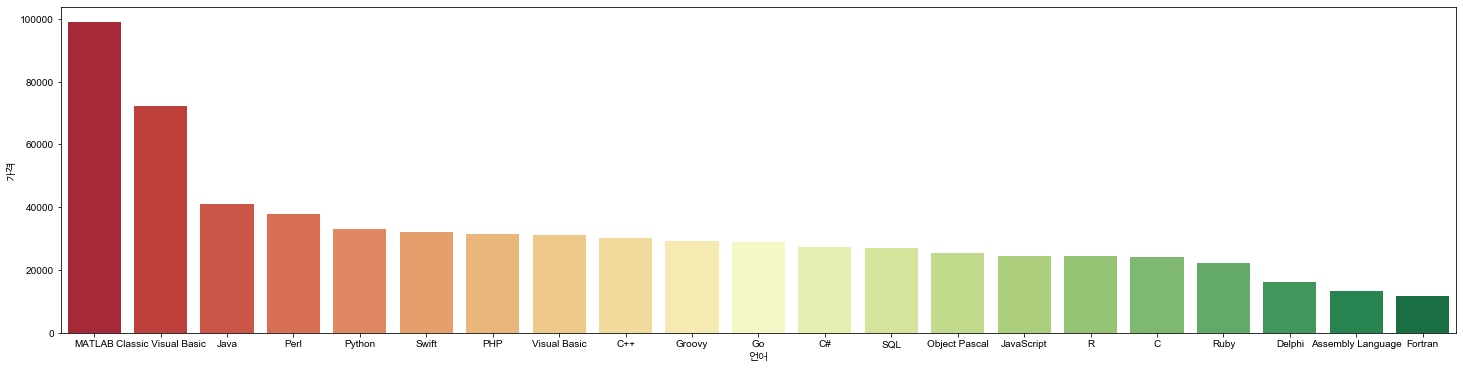

In [68]:
plt.figure(figsize=(25,6))
sns.barplot(data=price_table, x='언어', y='가격', palette="RdYlGn")

- 프로그래밍 언어별 책 평균가격은 MATLAB이 약 99,000원으로 가장 비쌌고, Fortran이 약 11,800원으로 가장 저렴했습니다.
- MATLAB 관련 책의 평균 가격이 비싼 것은 책의 대부분이 해외에서 수입된 도서이기 때문인 것으로 보입니다.
- Fortran 관련 책의 경우, 국내 서적이면서 2000년 이전에 발간된 경우가 많아서 최근 물가가 도서 가격에 반영되지 않은 것으로 보입니다.

### 2-2. 언어별 책 페이지수

In [70]:
df_page = df[['페이지수', '언어']].copy()
df_page

,페이지수,언어
0,604,Python
1,360,Python
2,460,Python
3,724,Python
4,460,Python
...,...,...
321,1116,Object Pascal
322,620,Object Pascal
323,1468,Object Pascal
324,1580,Object Pascal


In [71]:
page_by_language = pd.pivot_table(df_page, index='언어', aggfunc='mean')
page_by_language.sort_values(by='페이지수', ascending=False)

,페이지수
언어,
Object Pascal,901.533333
Classic Visual Basic,806.866667
Java,689.875000
C++,624.571429
C,581.705882
C#,546.375000
Swift,506.416667
PHP,498.400000
SQL,484.388889


In [95]:
book_pages = page_by_language.sort_values(by='페이지수', ascending=False)
book_pages

,페이지수
언어,
Object Pascal,901.533333
Classic Visual Basic,806.866667
Java,689.875000
C++,624.571429
C,581.705882
C#,546.375000
Swift,506.416667
PHP,498.400000
SQL,484.388889


In [96]:
book_pages =book_pages.reset_index()
book_pages.columns = ['언어','페이지수']
book_pages.head()

,언어,페이지수
0,Object Pascal,901.533333
1,Classic Visual Basic,806.866667
2,Java,689.875000
3,C++,624.571429
4,C,581.705882


In [97]:
book_pages

,언어,페이지수
0,Object Pascal,901.533333
1,Classic Visual Basic,806.866667
2,Java,689.875000
3,C++,624.571429
4,C,581.705882
5,C#,546.375000
6,Swift,506.416667
7,PHP,498.400000
8,SQL,484.388889
9,Go,469.615385


<AxesSubplot:xlabel='언어', ylabel='페이지수'>

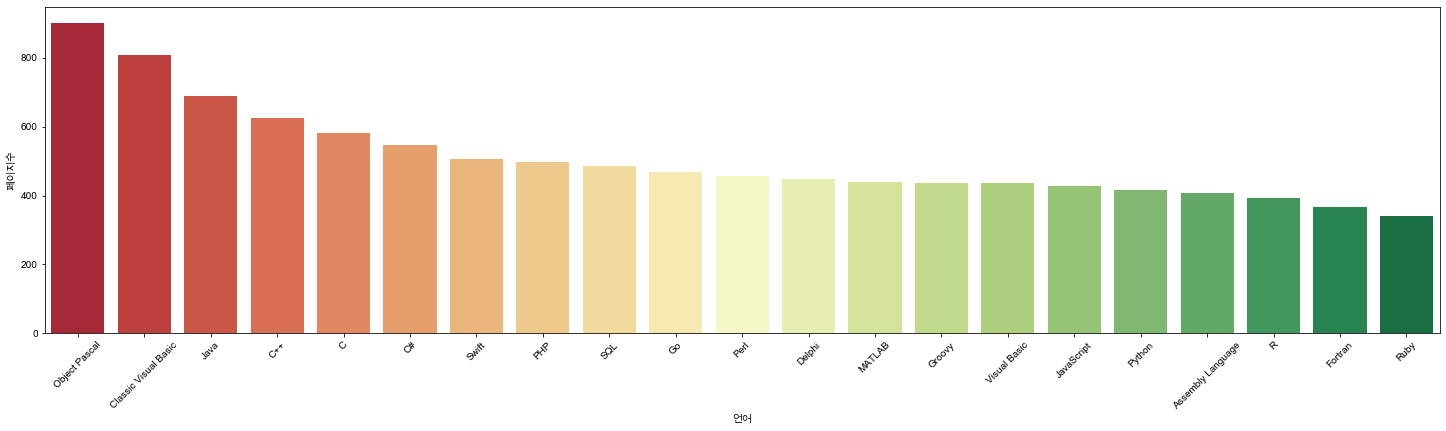

In [100]:
plt.figure(figsize=(25,6))
plt.xticks(rotation=45)
sns.barplot(data=book_pages, x='언어', y='페이지수', palette="RdYlGn")

- 프로그래밍 언어 책의 페이지수는 오브젝트 파스칼이 평균 약 900페이지로 가장 많았고, 루비가 약 340페이지로 가장 적었습니다.
- 문법이 단순하고 초보자의 진입장벽이 낮을 수록 책이 얇은 경향이 있으며, 문법이 어렵고 배우기가 어려울 수록 설명할 내용이 많아서 책이 두꺼운 경향이 있는 것으로 보입니다.
- 프로그래밍 언어 책은 평균 400페이지에서 600페이지 사이의 분량으로 출판된 경우가 가장 많았습니다.

---

### 2-3. 책 페이지 수와 가격 사이의 상관관계

In [102]:
df_page_price = df[['가격', '페이지수']].copy()
df_page_price

,가격,페이지수
0,34000,604
1,18800,360
2,18000,460
3,38000,724
4,32000,460
...,...,...
321,30000,1116
322,18000,620
323,32000,1468
324,39000,1580


<AxesSubplot:>

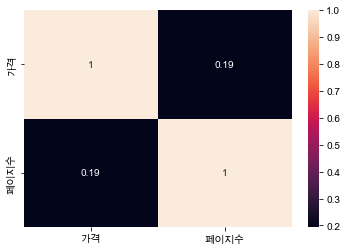

In [104]:
corr = df_page_price.corr(method='pearson')
sns.heatmap(corr, annot=True)

- 수치형 데이터 간의 상관성은 피어슨 상관계수를 통해 확인할 수 있습니다.
- 프로그래밍 언어 책의 가격과 페이지수를 기준으로 피어슨 상관계수를 구했을 때, 두 가지 요소 사이의 상관계수는 0.19로 나타났습니다.
- 피어슨 상관계수가 0.1과 0.3 사이의 값으로 나타난 경우, 약한 양적 선형관계를 가지고 있다고 해석할 수 있습니다.
- 즉, 책의 페이지 수와 가격은 약간 비례한다고 볼 수 있습니다.